In [7]:
import pandas as pd

In [10]:
#opened the fact_bookings csv file
df_bookings = pd.read_csv("Datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


In [12]:
#print how many rows & columns
df_bookings.shape

(134590, 12)

In [13]:
#print how many unique room categories field
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [14]:
#print how many unique booking platforms 
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [15]:
#Print the number of bookings received from each individual booking platform
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

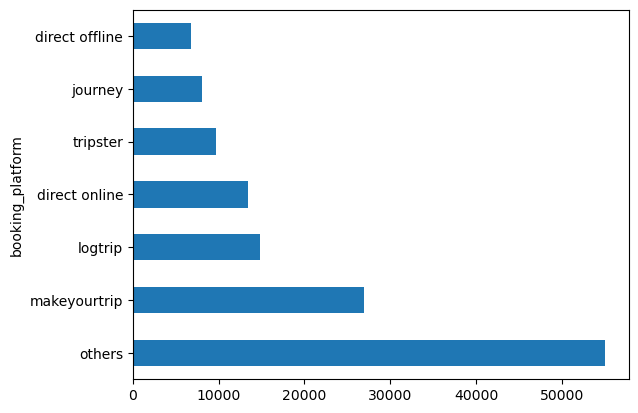

In [21]:
#plot all the bookings in bar chart
df_bookings.booking_platform.value_counts().plot(kind="barh")
#barh represents horizontal chart

In [22]:
#print the statstics on numeric column
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [23]:
#Loading the remaining csv file
df_date = pd.read_csv("Datasets/dim_date.csv")
df_hotels = pd.read_csv("Datasets/dim_hotels.csv")
df_rooms = pd.read_csv("Datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("Datasets/fact_aggregated_bookings.csv")

In [25]:
#print how many rows & columns
df_hotels.shape

(25, 4)

In [26]:
#print first four rows
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [28]:
#Print the number hotels category
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [29]:
#Print how many hotels are there in each cities
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

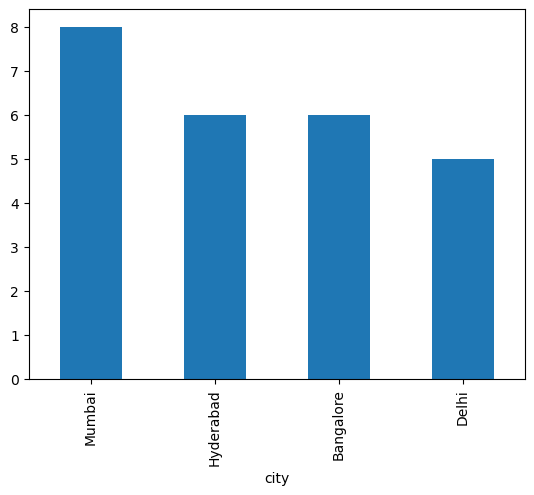

In [31]:
#Plot a bar chart according to the cities
df_hotels.city.value_counts().plot(kind="bar")

In [33]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0


In [34]:
#Find out unique property ids in aggregate bookings dataset
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [41]:
#Find out total bookings per property_id
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [43]:
#Find out days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [44]:
#Find out properties that have highest capacity
df_agg_bookings.capacity.max()

50.0